In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./niceplot2jay.mplstyle')

import numpy as np
from utils_spctrm import *
from utils_folding import *

Only the CPU-only flavour of Voxelize is available!


Goal: best performance with minimum bspace traversed
- Cut off a beta, compute diff, denote each one
- best 10% to worst 10%?


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 31576651 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	2.821e+07 exact calculations (R>Rmax),
	3.364e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 31576651 numbers in 981 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 3.9128 seconds
In the end, 0 in cpu_queue


Specific kinetic energy before FFT: 7.27e+04
Specific kinetic energy after FFT: 7.27e+04
Conserved quantity after sampling: 6.30e+04


/appalachia/d6/yujie/Test_PowerSpec/utils_folding.py:630: RuntimeWarning: invalid value encountered in true_divide
  P = Psum/Nsample
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)


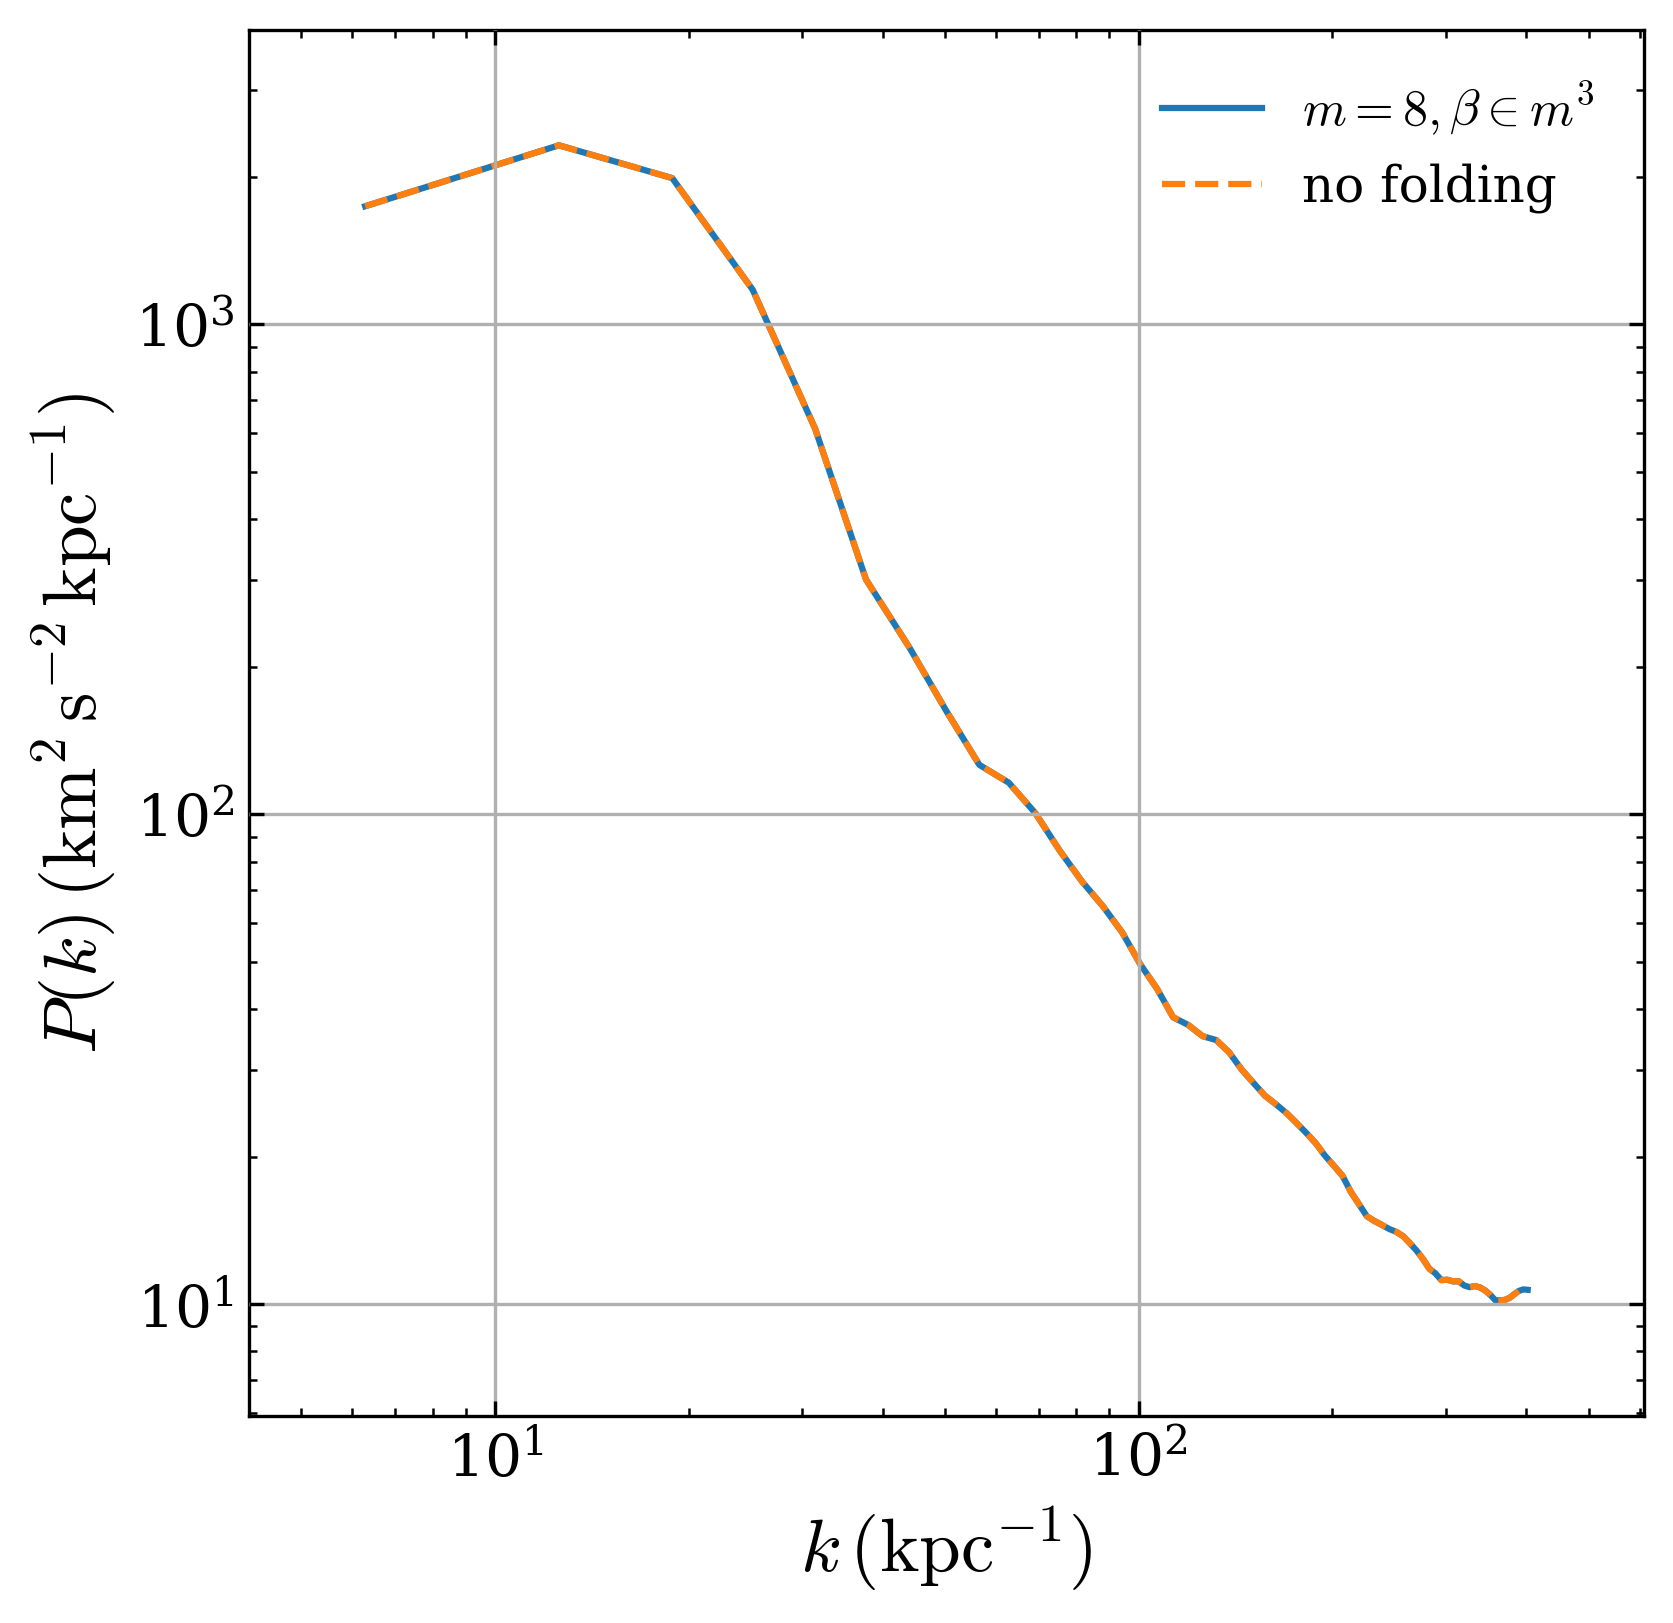

In [2]:
# Load Particles
# Interpolate to Field
# Compute Spectrum with a large FFT
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind4_gmc9/snapshot_550.hdf5'
simParticles = load_snapshot(file, remove_bulk_velocity=True, shift_to_origin=True)
simField3D = simParticles.interp_field(Nsize=128, smoothing_rate=1.) # Field object
trueSpctrm = simField3D.spctrm() # Spectrum object

# Fold to m^3 Folded
# Compute folded Spectrum with (N/m)^3 sized FFT
m = 8
list = []
for beta in init_beta_space(m=m):
  foldedField3D = simField3D.fold(m=m, beta=beta, quantity='velocity') # fold N^3 -> N^3/m^3
  pwrSpctrm = foldedField3D.fold_spctrm(beta=beta) # Compute
  list.append(pwrSpctrm)
spctrmList = SpectrumList(list)
fullSpctrm = spctrmList.combine_from_beta_sequence()

# Compare the full spectrum retored with the no folding case before
# running other tests.
fig, ax = plt.subplots()
fullSpctrm.plot(ax=ax, label='$m={}, \\beta\\in m^3$'.format(m))
trueSpctrm.plot(ax=ax, label='no folding', linestyle='dashed')
plt.legend()
plt.show()

In [3]:
# Initialize a m^3 space
bspace = init_beta_space(m=m)
print(bspace.shape)
# Compute difference after removing each beta, as a indicator of the
# importance of the beta
beta_loss_list = []
for beta in bspace:
  miss1Spctrm = fullSpctrm.copy()
  miss1Spctrm.remove(spctrmList[beta])
  beta_loss = relative_diff(trueSpctrm, miss1Spctrm, mode='max')
  beta_loss_list.append(beta_loss)
beta_loss_list = np.array(beta_loss_list)

(512, 3)
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered in (P1-P2)/P1. Avoided by setting P1 = 1e-10.
Divided by zero encountered i

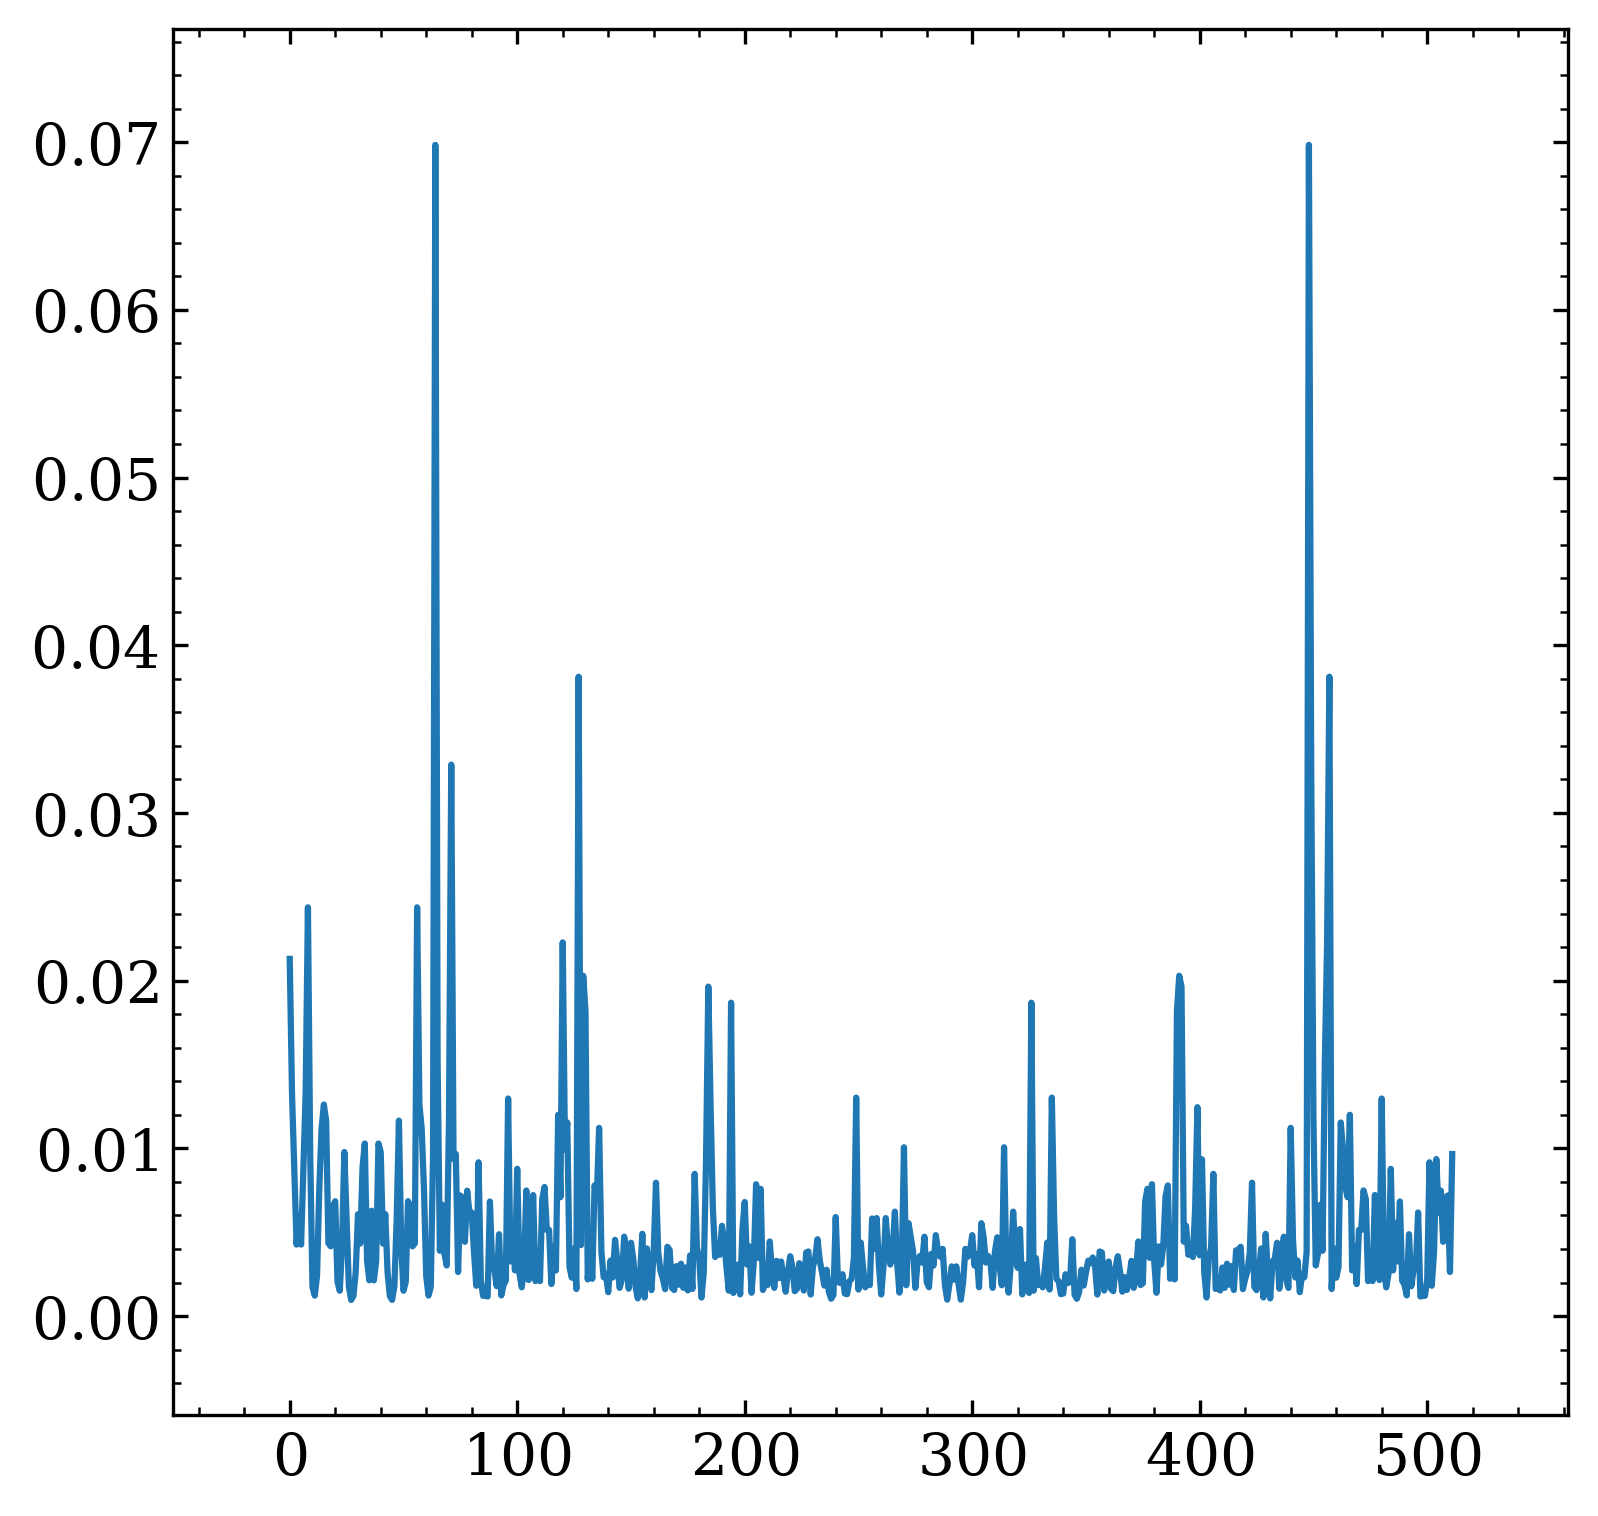

In [4]:
plt.plot(beta_loss_list)
plt.show()

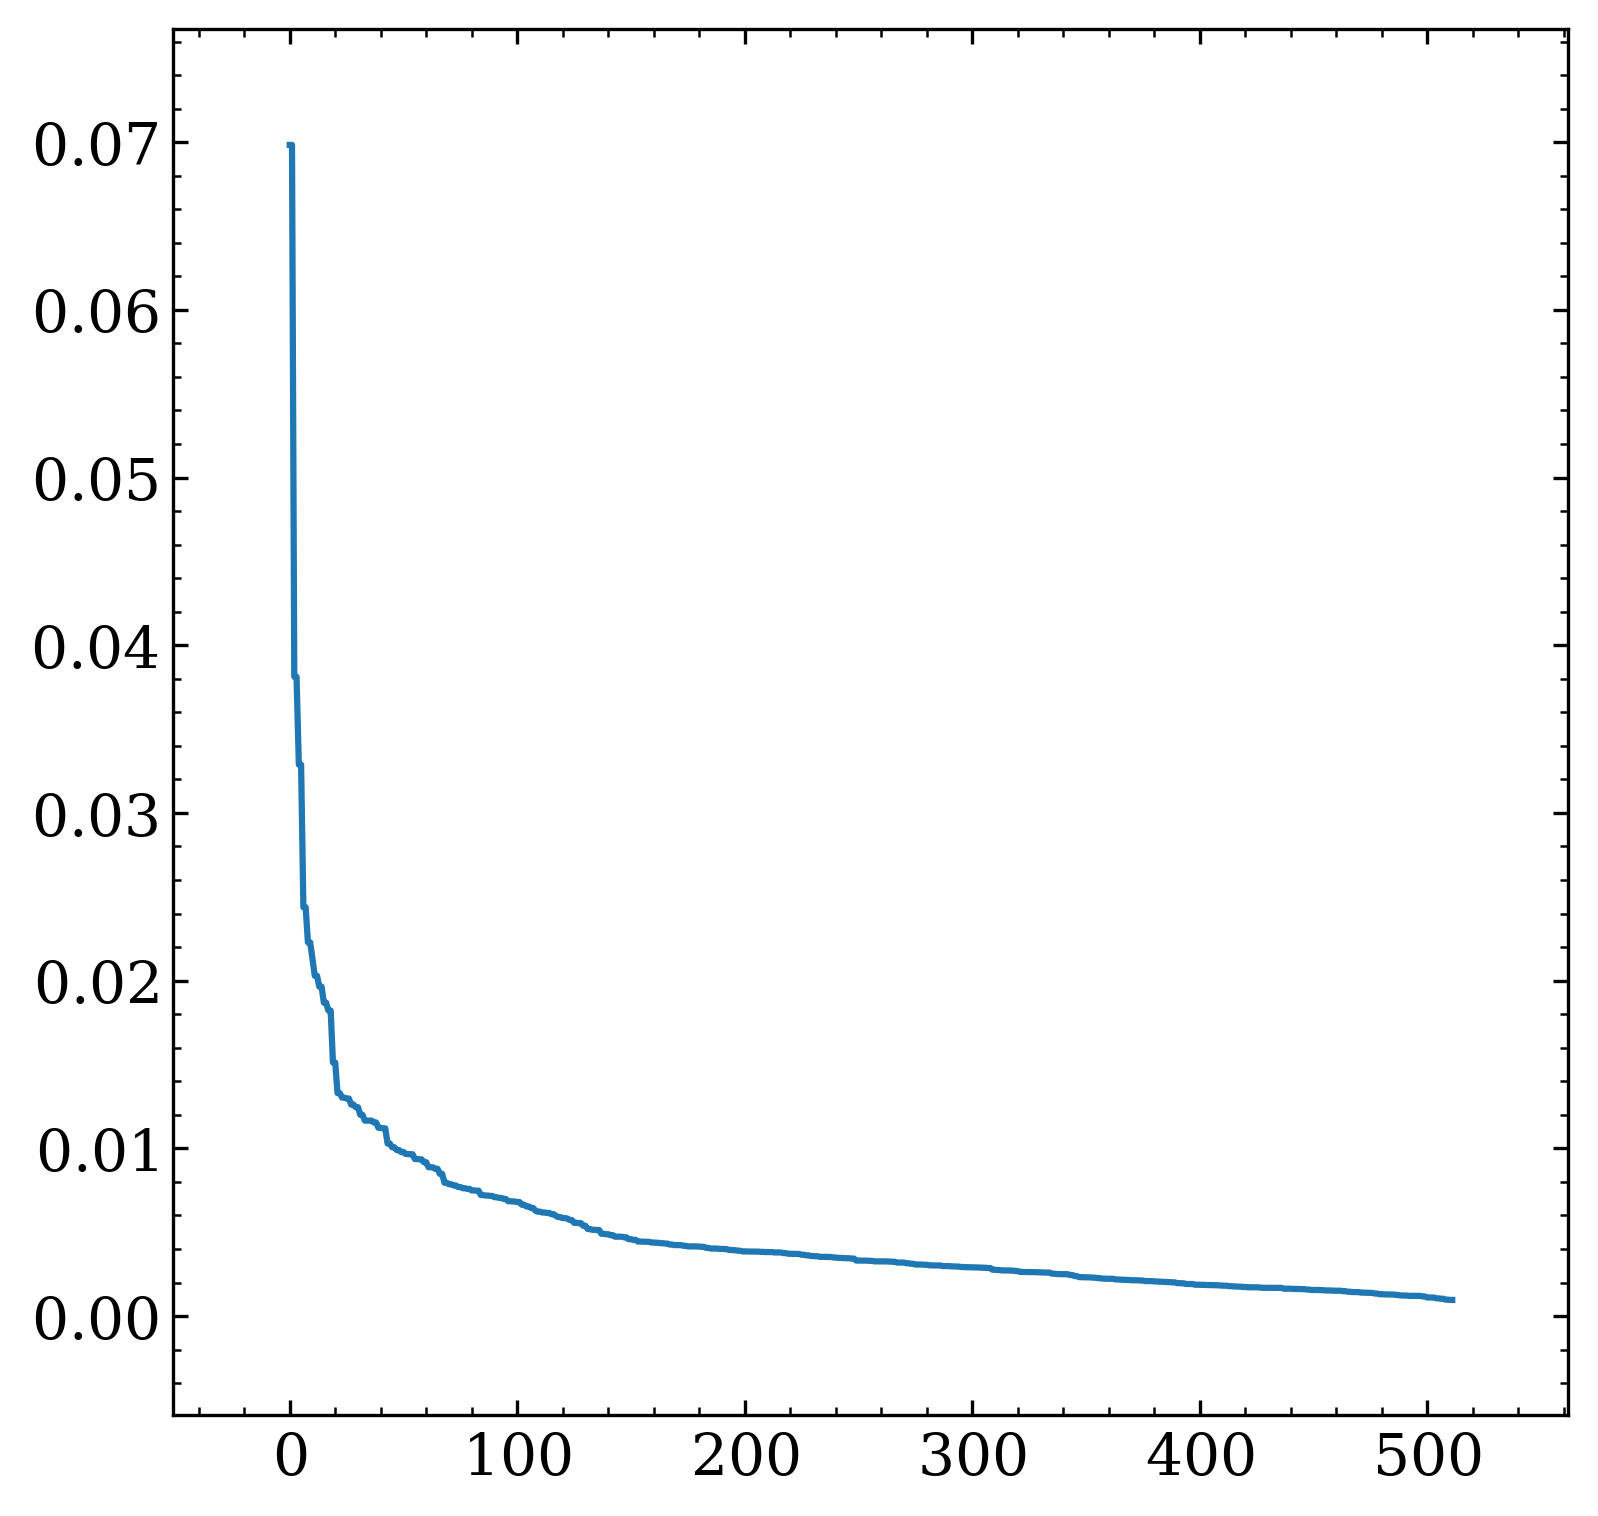

In [5]:
# Sort
sorted_bseq = bspace[np.argsort(beta_loss_list)[::-1]]
sorted_loss = beta_loss_list[np.argsort(beta_loss_list)[::-1]]
plt.plot(sorted_loss)
plt.show()

In [6]:
# Save
np.savetxt('sorted_bseq.txt', sorted_bseq, fmt='%.1d')
np.savetxt('sorted_loss.txt', sorted_loss)

1. Load `sorted_bspace.txt` and `sorted_loss.txt` (actually you still need to run all above because you'll need the spectra)
2. Calculate spctrm of the first and last 10\25\50\100
3. Plot to compare

In [7]:
import numpy as np
sorted_bseq = np.loadtxt('sorted_bseq.txt')
sorted_loss = np.loadtxt('sorted_loss.txt')

/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)


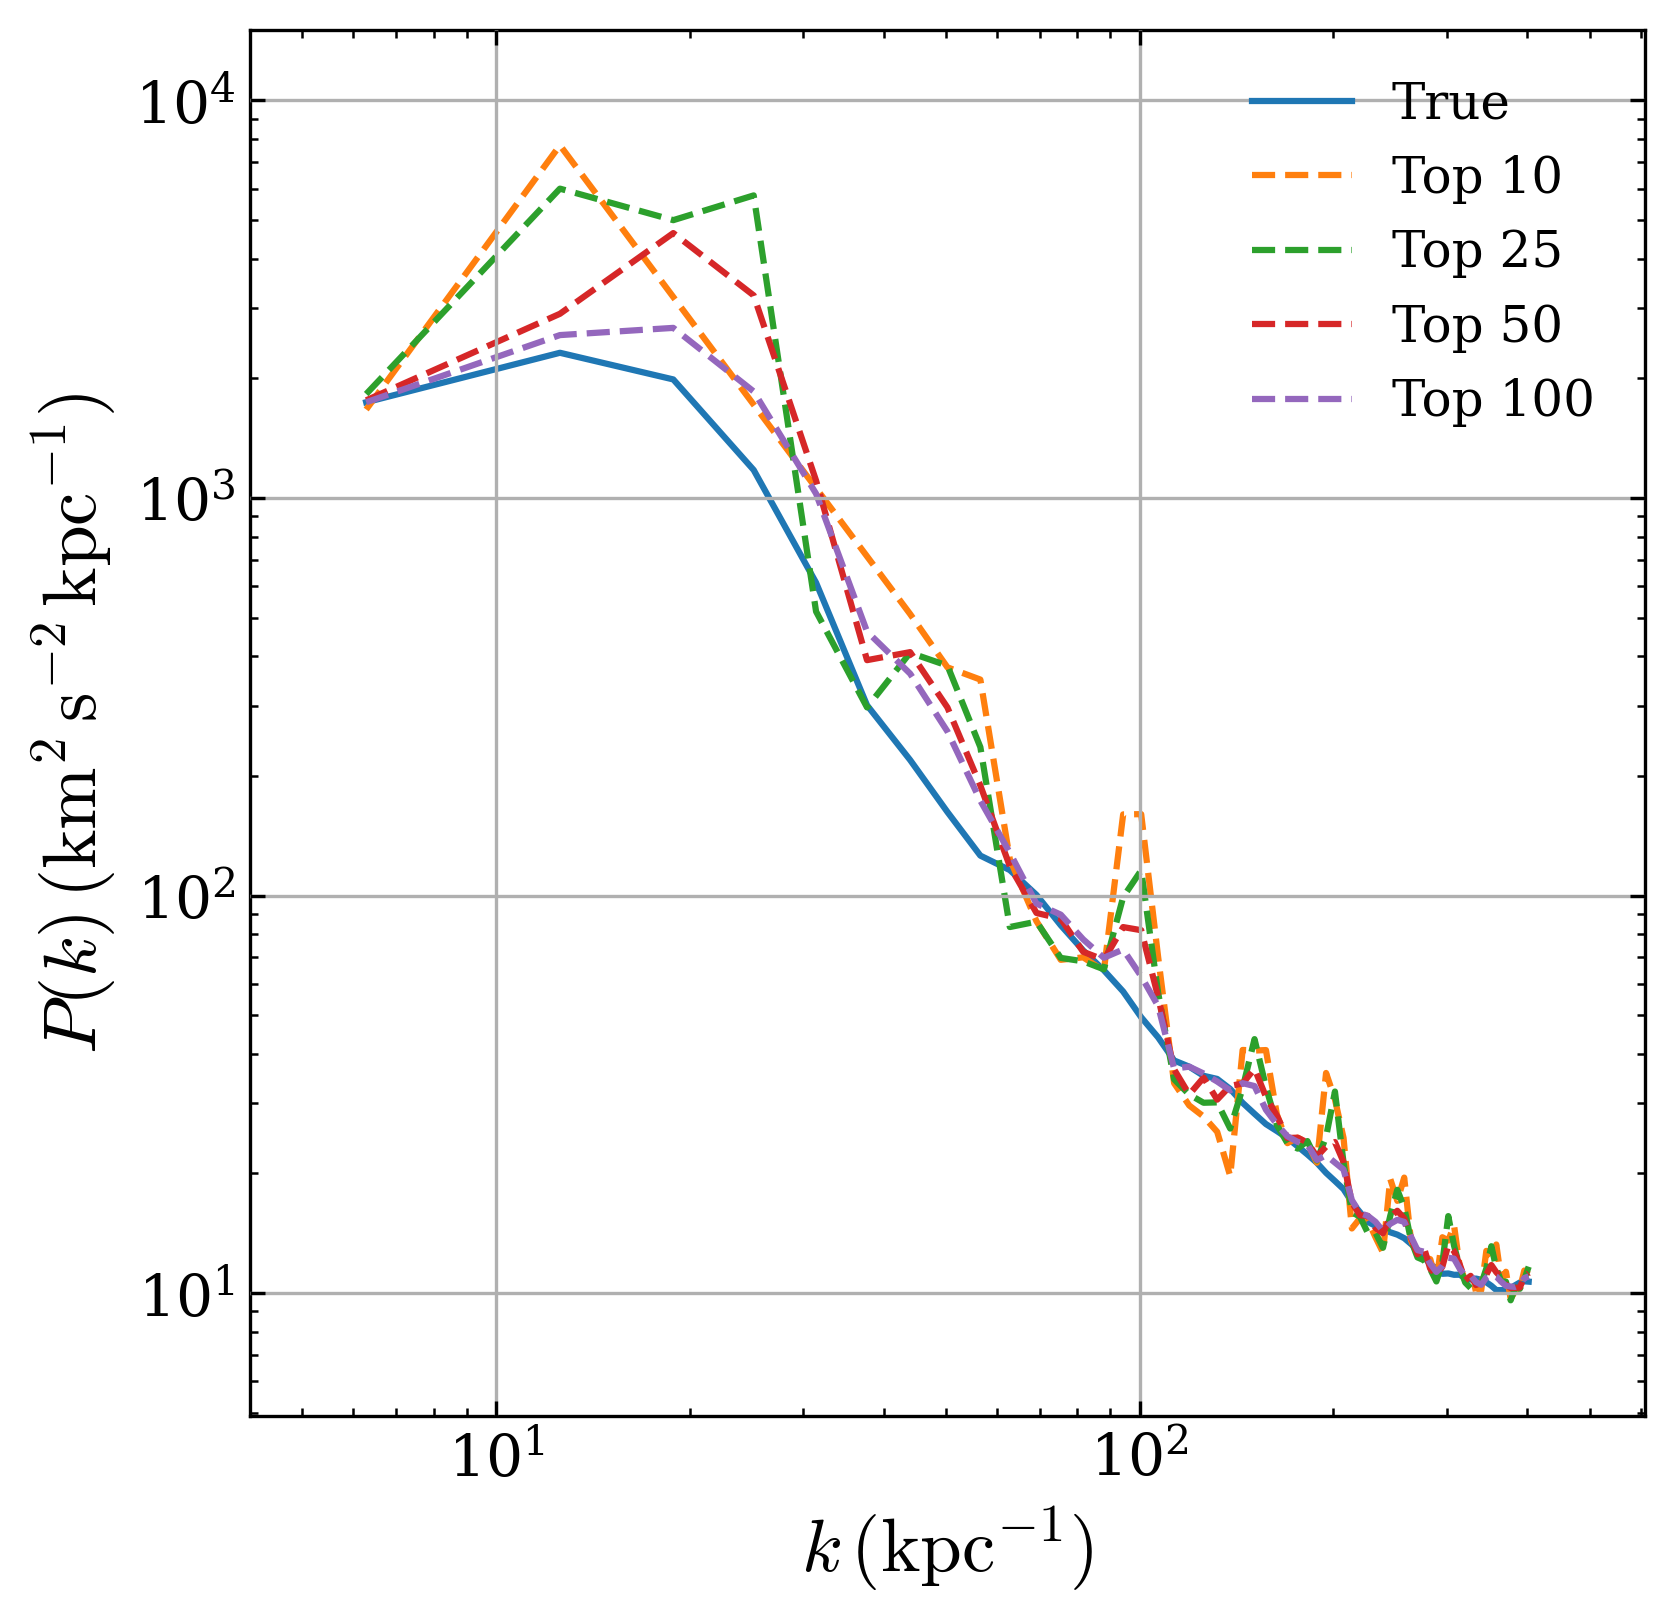

In [8]:
fig, ax = plt.subplots()
trueSpctrm.plot(ax=ax, label='True')
for num in [10, 25, 50, 100]:
  combinedSpctrm = spctrmList.combine_from_beta_sequence(beta_sequence=sorted_bseq[:num])
  combinedSpctrm.plot(ax=ax, label='Top {}'.format(num), linestyle='dashed')
plt.legend()
plt.show()

/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)


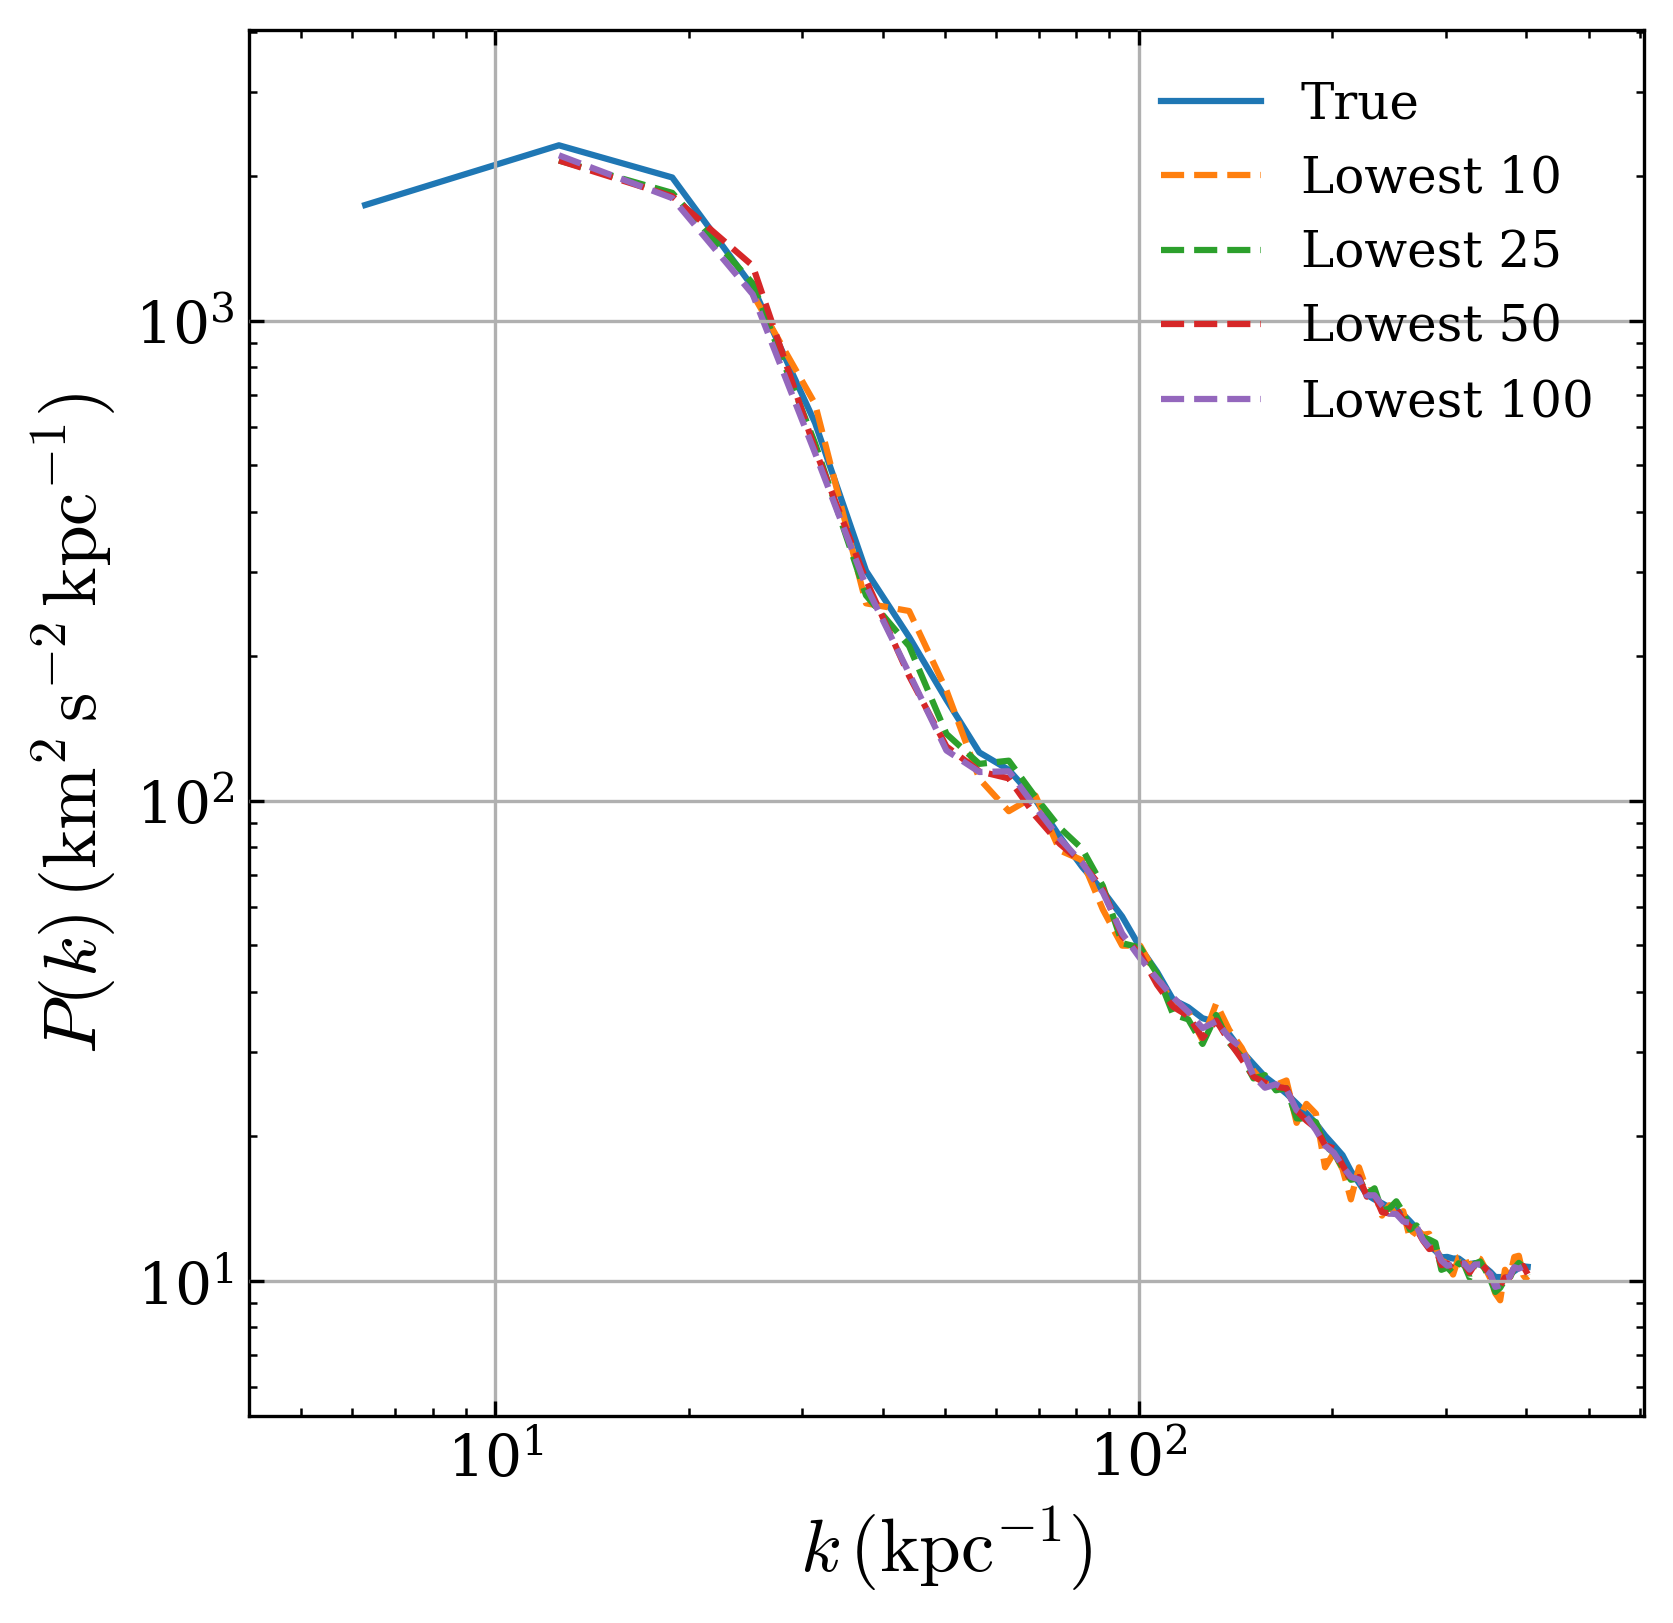

In [9]:
fig, ax = plt.subplots()
trueSpctrm.plot(ax=ax, label='True')
for num in [10, 25, 50, 100]:
  combinedSpctrm = spctrmList.combine_from_beta_sequence(beta_sequence=sorted_bseq[-num:])
  combinedSpctrm.plot(ax=ax, label='Lowest {}'.format(num), linestyle='dashed')
plt.legend()
plt.show()

In [10]:
sorted_bseq[-10:], sorted_bseq[:10]

(array([[3., 2., 6.],
        [5., 6., 2.],
        [7., 5., 6.],
        [1., 3., 2.],
        [2., 3., 5.],
        [6., 5., 3.],
        [1., 4., 4.],
        [7., 4., 4.],
        [5., 5., 0.],
        [3., 3., 0.]]),
 array([[0., 0., 7.],
        [0., 0., 1.],
        [7., 7., 1.],
        [1., 1., 7.],
        [1., 0., 7.],
        [7., 0., 1.],
        [0., 7., 0.],
        [0., 1., 0.],
        [0., 1., 7.],
        [0., 7., 1.]]))

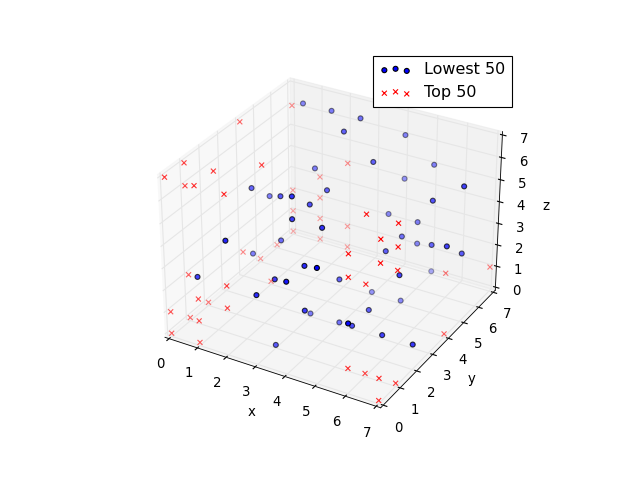

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
m = 8
plt.style.use('classic')
fig = plt.figure()
ax = plt.axes(projection="3d")
num = 50
ax.scatter(sorted_bseq[-num:,0], sorted_bseq[-num:,1], sorted_bseq[-num:,2], label='Lowest {}'.format(num))
ax.scatter(sorted_bseq[:num,0], sorted_bseq[:num,1], sorted_bseq[:num,2], marker='x', color='red', label='Top {}'.format(num))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') # type: ignore
ax.set_xlim(0, m-1)
ax.set_ylim(0, m-1)
ax.set_zlim(0, m-1) # type: ignore
plt.legend()
plt.show()

A strategy inspired by this?

In [52]:
bseq = hilbert_beta_sequence(m=m)
hilbert_match = []
for beta in bseq:
  for i, beta2 in enumerate(sorted_bseq[::-1]):
    if (beta == beta2).all():
      hilbert_match.append(i)
      break
hilbert_match = np.array(hilbert_match)

In [53]:
bseq

[array([3, 3, 3]),
 array([3, 3, 5]),
 array([3, 5, 5]),
 array([3, 5, 3]),
 array([5, 5, 3]),
 array([5, 5, 5]),
 array([5, 3, 5]),
 array([5, 3, 3]),
 array([2, 2, 2]),
 array([2, 3, 2]),
 array([3, 3, 2]),
 array([3, 2, 2]),
 array([3, 2, 3]),
 array([2, 3, 3]),
 array([2, 2, 3]),
 array([2, 2, 4]),
 array([2, 2, 5]),
 array([3, 2, 5]),
 array([3, 2, 4]),
 array([3, 3, 4]),
 array([2, 3, 5]),
 array([2, 3, 4]),
 array([2, 4, 4]),
 array([2, 4, 5]),
 array([2, 5, 5]),
 array([2, 5, 4]),
 array([3, 5, 4]),
 array([3, 4, 5]),
 array([3, 4, 4]),
 array([3, 4, 3]),
 array([2, 4, 3]),
 array([2, 5, 3]),
 array([3, 5, 2]),
 array([2, 5, 2]),
 array([2, 4, 2]),
 array([3, 4, 2]),
 array([4, 4, 2]),
 array([5, 4, 2]),
 array([5, 5, 2]),
 array([4, 5, 2]),
 array([4, 5, 3]),
 array([5, 4, 3]),
 array([4, 4, 3]),
 array([4, 4, 4]),
 array([4, 4, 5]),
 array([4, 5, 5]),
 array([4, 5, 4]),
 array([5, 5, 4]),
 array([5, 4, 5]),
 array([5, 4, 4]),
 array([5, 3, 4]),
 array([4, 3, 5]),
 array([4, 3

In [60]:
sorted_bseq[::-1][:20]

array([[3., 3., 0.],
       [5., 5., 0.],
       [7., 4., 4.],
       [1., 4., 4.],
       [6., 5., 3.],
       [2., 3., 5.],
       [1., 3., 2.],
       [7., 5., 6.],
       [5., 6., 2.],
       [3., 2., 6.],
       [4., 3., 2.],
       [4., 5., 6.],
       [1., 6., 7.],
       [7., 2., 1.],
       [4., 5., 0.],
       [4., 3., 0.],
       [5., 2., 1.],
       [3., 6., 7.],
       [2., 6., 7.],
       [6., 2., 1.]])

In [57]:
np.argwhere(hilbert_match < 50)

array([[  1],
       [  4],
       [ 13],
       [ 17],
       [ 20],
       [ 24],
       [ 27],
       [ 41],
       [ 54],
       [ 61],
       [ 82],
       [ 90],
       [ 98],
       [101],
       [106],
       [118],
       [145],
       [155],
       [169],
       [179],
       [198],
       [217],
       [222],
       [225],
       [289],
       [294],
       [314],
       [321],
       [326],
       [327],
       [336],
       [337],
       [351],
       [355],
       [363],
       [365],
       [384],
       [394],
       [399],
       [426],
       [427],
       [430],
       [457],
       [470],
       [475],
       [488],
       [489],
       [493],
       [499],
       [500]])

/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)
/appalachia/d6/yujie/Test_PowerSpec/utils_spctrm.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.P = self.Psum / self.Nsample * (4*np.pi*self.k**2)


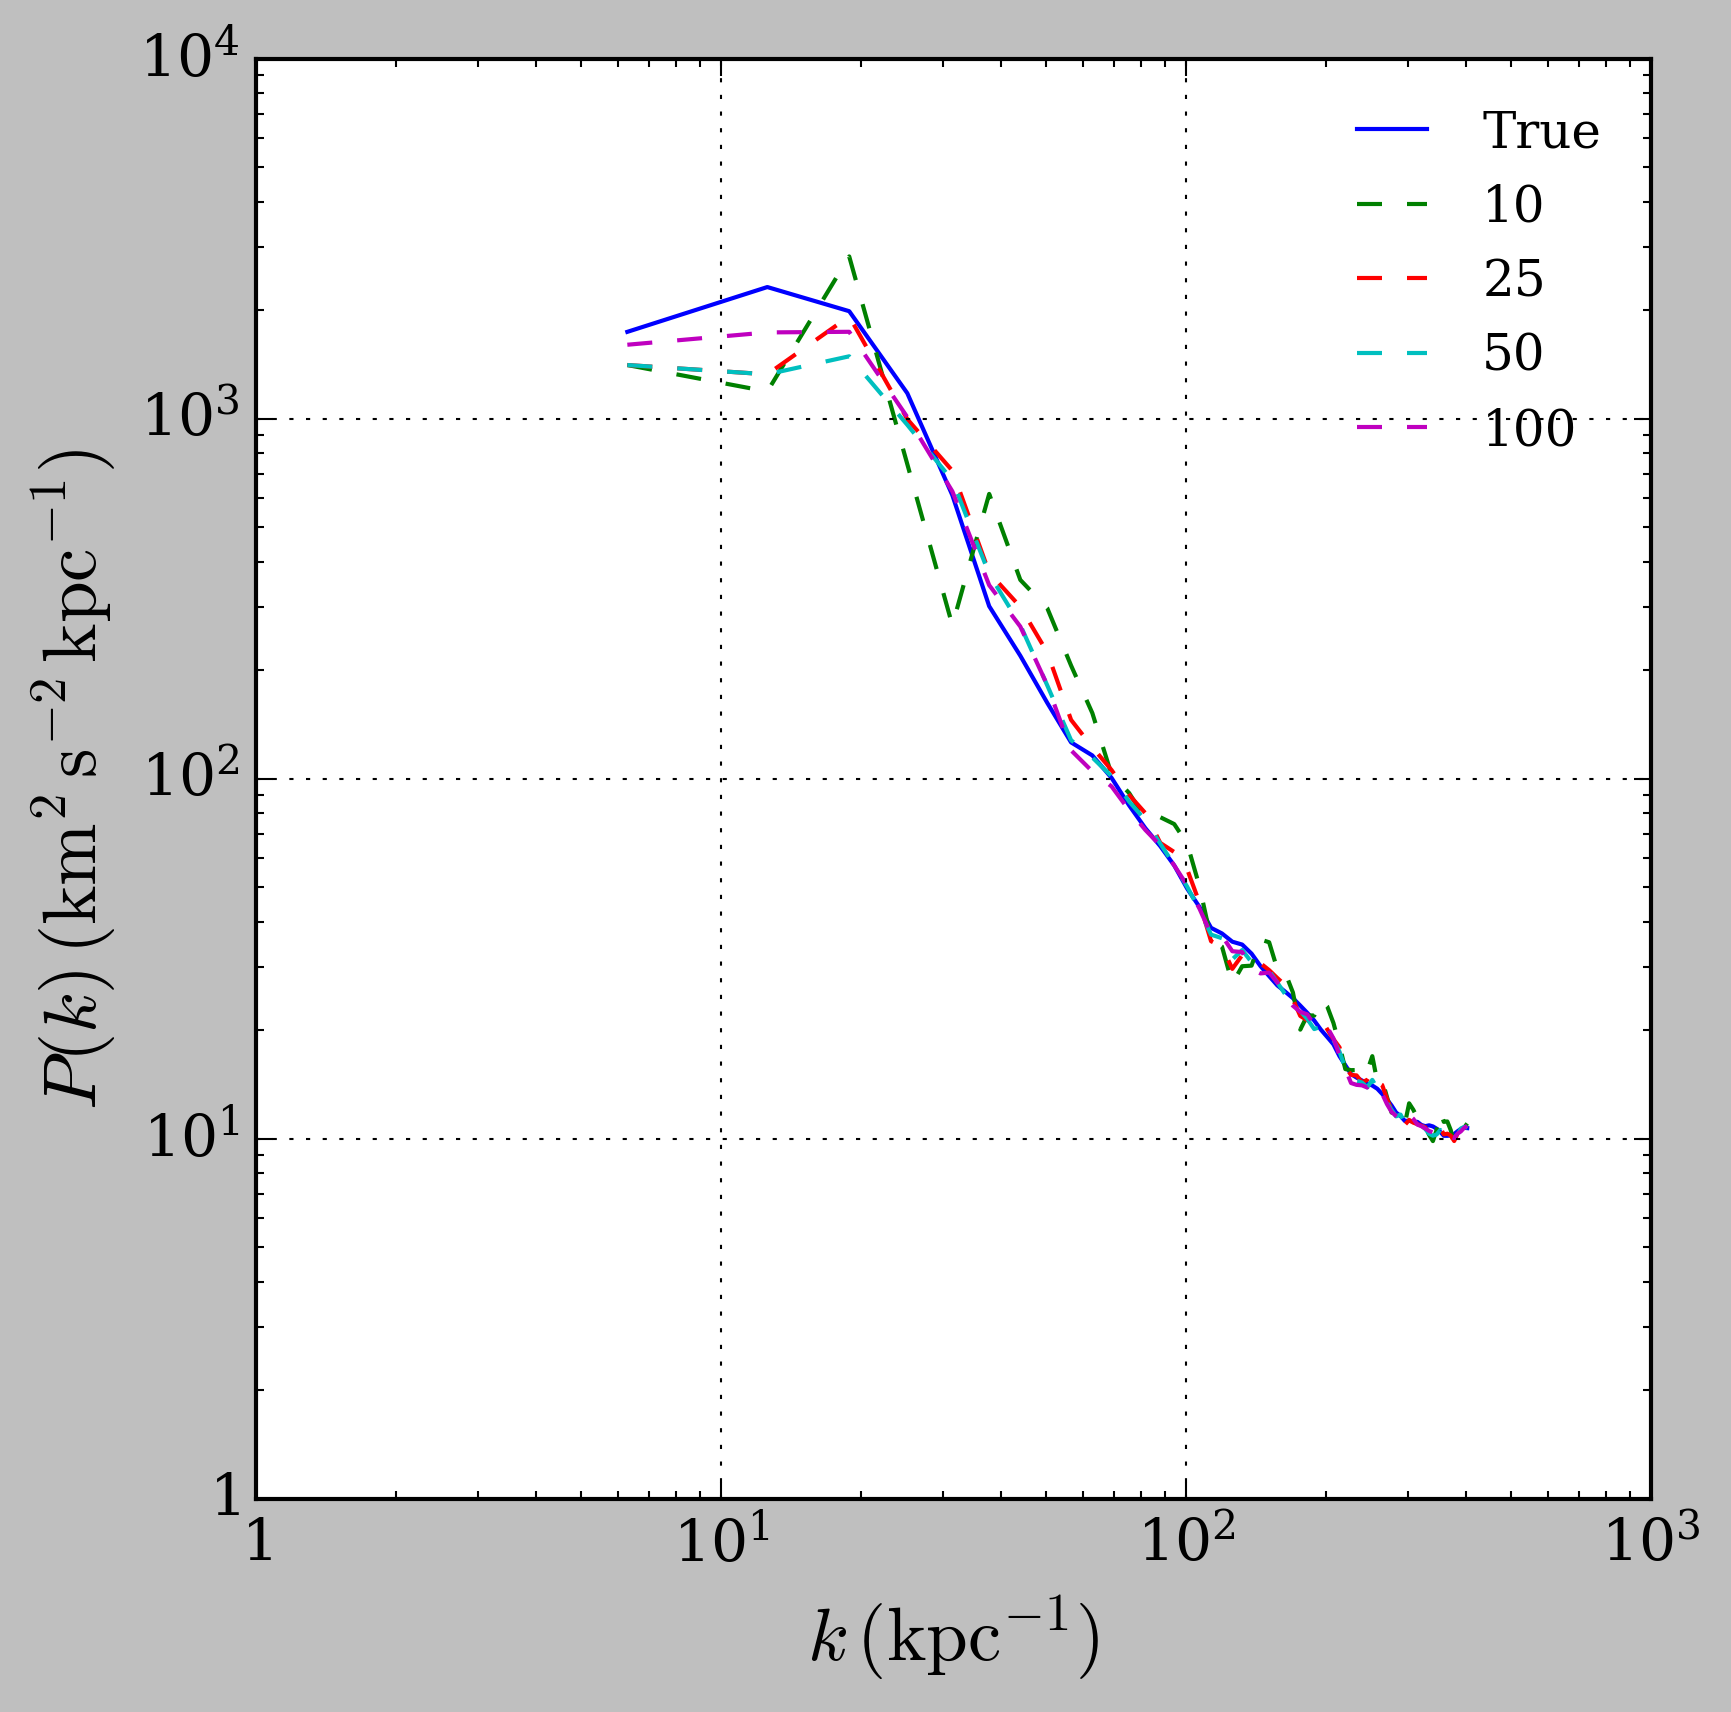

In [58]:
%matplotlib inline
plt.style.use('./niceplot2jay.mplstyle')
bseq = hilbert_beta_sequence(m=m)
fig, ax = plt.subplots()
trueSpctrm.plot(ax=ax, label='True')
for num in [10, 25, 50, 100]:
  combinedSpctrm = spctrmList.combine_from_beta_sequence(beta_sequence=bseq[-num:])
  combinedSpctrm.plot(ax=ax, label='{}'.format(num), linestyle='dashed')
plt.legend()
plt.show()